In [1]:
# Predicting the correct number from a given image
# Importing libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits=load_digits()

In [2]:
#Visualize the shape of the digits
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


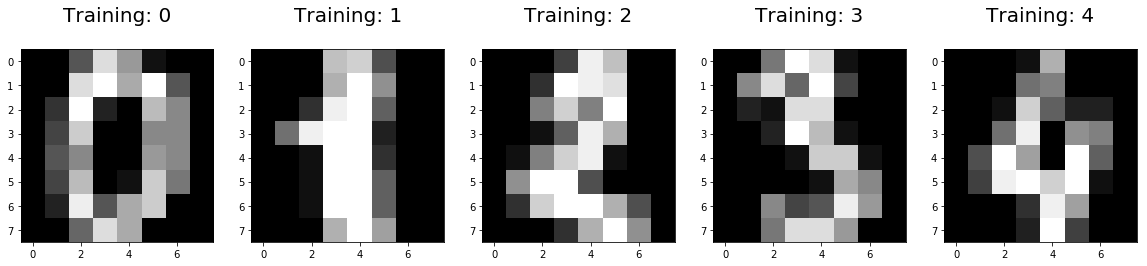

In [4]:
# Visualize some sample training numbers
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Training: %i\n' %label,fontsize=20)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.23,random_state=2)

In [6]:
print(x_train.shape)

(1383, 64)


In [7]:
print(y_train.shape)

(1383,)


In [8]:
print(x_test.shape)

(414, 64)


In [9]:
print(y_test.shape)

(414,)


In [11]:
from sklearn.linear_model import LogisticRegression
logisticRegr=LogisticRegression()
logisticRegr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
# Prediction for one image
print(logisticRegr.predict(x_test[0].reshape(1,-1)))

[4]


In [13]:
logisticRegr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [14]:
predictions=logisticRegr.predict(x_test)

In [15]:
#Accuracy
score=logisticRegr.score(x_test,y_test)
print(score)

0.9420289855072463


In [16]:
# More diagonal numbers, more better it is 
cm=metrics.confusion_matrix(y_test,predictions)
print(cm)

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  1  0  0  0  0  2  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  3  2  0]
 [ 0  2  0  0 34  0  0  0  1  1]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 40  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  2  0  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  1  3 28]]


Text(0.5,1,'Accuracy Score: 0.9420289855072463')

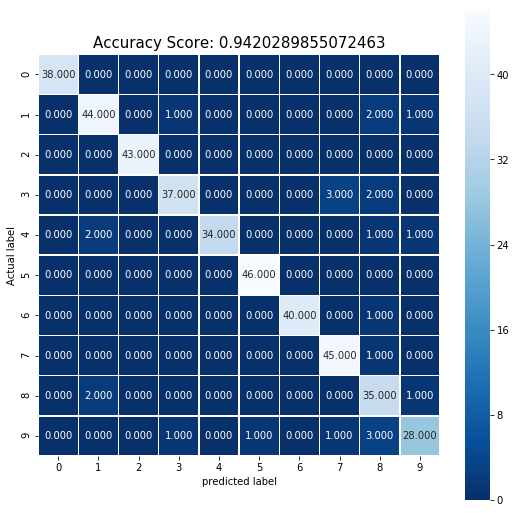

In [17]:
# visualizing the accuracy or confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f",linewidths=0.5,square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('predicted label')
all_sample_title='Accuracy Score: {0}'.format(score)
plt.title(all_sample_title,size=15)

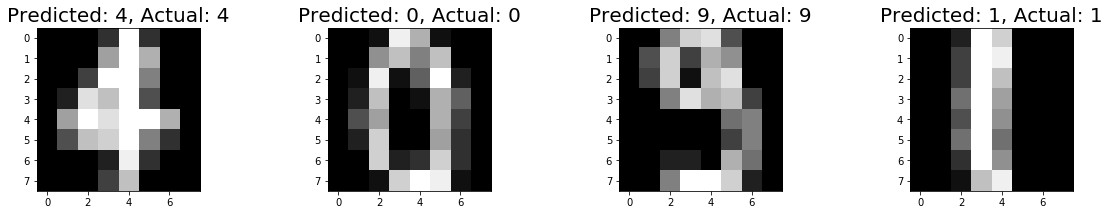

In [18]:
# Sample predictions
index=0
classifiedIndex=[]
for predict, actual in zip(predictions,y_test):
    if predict == actual:
        classifiedIndex.append(index)
        index+=1
        
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex +1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[wrong],y_test[wrong]),fontsize=20)